# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定檔案路徑
dir_data = './data/home_credit_default_risk/'

# 指定檔案名稱
f_app = os.path.join(dir_data , 'application_train.csv')

# pandas讀取csv檔
app_train = pd.read_csv(f_app)
app_train.shape

(307511, 122)

In [3]:
# 引用 Label Encoder的套件
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一欄(column)，如果資料型別是類別型(object)且值只有兩種，就做編碼
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            app_train[col] = le.fit_transform(app_train[col])


print(app_train.shape)
app_train.head(7)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
# 將出生數轉成年齡
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365

In [10]:
app_train['YEARS_BIRTH'].value_counts().sort_index()

20.517808    1
21.021918    1
21.030137    2
21.035616    3
21.038356    1
21.041096    7
21.043836    2
21.046575    1
21.049315    3
21.052055    2
21.054795    1
21.057534    1
21.060274    3
21.063014    4
21.065753    3
21.068493    6
21.071233    3
21.073973    4
21.076712    3
21.079452    3
21.082192    6
21.084932    6
21.087671    3
21.090411    5
21.093151    2
21.095890    5
21.098630    4
21.104110    2
21.106849    4
21.109589    4
            ..
68.928767    3
68.931507    2
68.934247    3
68.936986    1
68.939726    1
68.942466    1
68.945205    3
68.947945    3
68.950685    2
68.953425    3
68.956164    1
68.958904    3
68.967123    1
68.972603    2
68.975342    1
68.978082    1
68.983562    1
68.986301    1
68.991781    1
68.997260    1
69.002740    1
69.005479    1
69.016438    1
69.019178    2
69.027397    1
69.030137    4
69.032877    2
69.041096    1
69.043836    2
69.120548    1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

In [19]:
# 將年齡分成幾個等分
# 20、30、40、50、60、70、80、90、100
bins = [20,30,40,50,60,70,80,90,100]
app_train['YEARS_BIRTH_grp'] = pd.cut(app_train['YEARS_BIRTH'] , bins)

In [20]:
app_train['YEARS_BIRTH_grp'].value_counts().sort_index()

(20, 30]     45021
(30, 40]     82308
(40, 50]     76541
(50, 60]     68062
(60, 70]     35579
(70, 80]         0
(80, 90]         0
(90, 100]        0
Name: YEARS_BIRTH_grp, dtype: int64

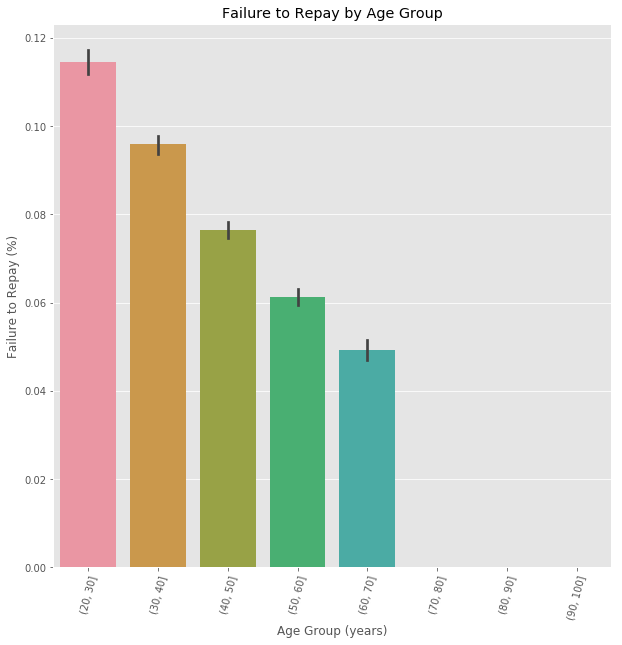

In [21]:
import seaborn as sns

plt.figure( figsize = (10,10) )
plt.style.use('ggplot')

px = app_train['YEARS_BIRTH_grp']
py = app_train['TARGET']

sns.barplot(px,py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [28]:
# 以收入做觀察
app_train['AMT_INCOME_TOTAL'].value_counts().sort_index()

25650.0          2
26100.0          3
26460.0          1
26550.0          2
27000.0         66
27585.0          1
27900.0          7
27967.5          1
28161.0          1
28350.0         11
28404.0          1
28575.0          3
28593.0          1
28723.5          1
28800.0          3
29133.0          1
29250.0         32
29583.0          1
29700.0          3
30150.0          7
30600.0          6
30915.0          1
31050.0          1
31500.0        184
31531.5          1
31815.0          1
31860.0          1
31950.0          4
31990.5          1
32040.0          1
              ... 
1358550.0        1
1381500.0        1
1417500.0        1
1440000.0        2
1530000.0        1
1575000.0       18
1665000.0        1
1755000.0        1
1800000.0       14
1890000.0        4
1935000.0        1
2025000.0        8
2070000.0        1
2160000.0        1
2214117.0        1
2250000.0       13
2475000.0        1
2700000.0        1
2930026.5        1
3150000.0        2
3375000.0        2
3600000.0   

In [31]:
# 由於收入差距懸殊，所以以頻做區分，盡量讓每個間格平均一點
app_train['INCOME'] = pd.qcut(app_train['AMT_INCOME_TOTAL'],10)
app_train['INCOME'].value_counts()

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: INCOME, dtype: int64

In [32]:
app_train['INCOME'].value_counts().sort_index()

(25649.999, 81000.0]       33391
(81000.0, 99000.0]         30280
(99000.0, 112500.0]        36907
(112500.0, 135000.0]       48849
(135000.0, 147150.0]        4333
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(180000.0, 225000.0]       44809
(225000.0, 270000.0]       19957
(270000.0, 117000000.0]    27161
Name: INCOME, dtype: int64

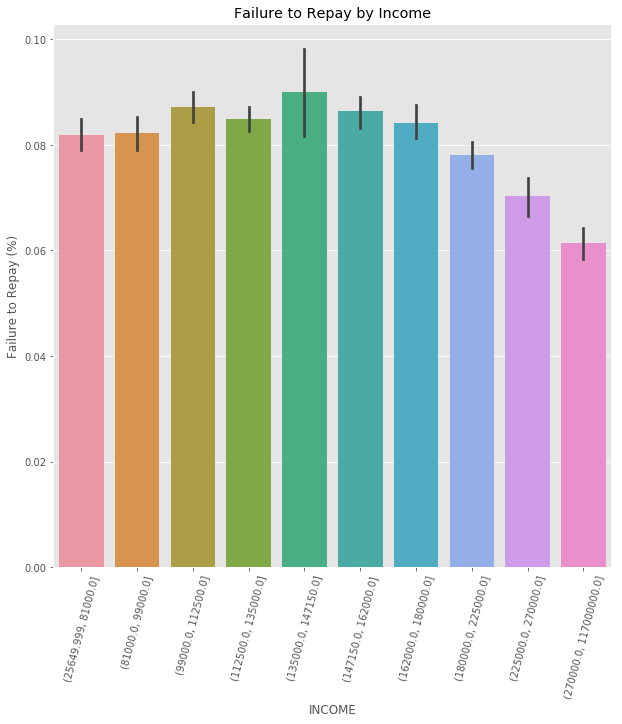

In [33]:
plt.figure( figsize = (10,10) )
plt.style.use('ggplot')

px = app_train['INCOME']
py = app_train['TARGET']

sns.barplot(px,py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('INCOME'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income');